## import numpy as np
import numpy.random as rnd
from scipy import random
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure


def energy_ising_2d(configuration,J):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False
    arr = -J *configuration * convolve(configuration, kern, mode='constant', cval=0)
    return arr.sum()


        

Starting configuration:


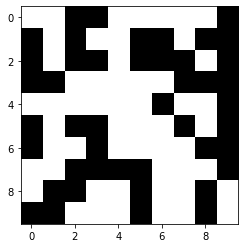

0+10:  Energy: -12 Spin: 0.1


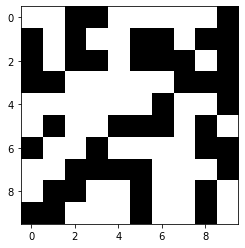

10+10:  Energy: -20 Spin: 0.06


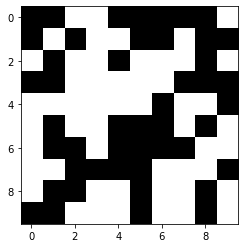

20+10:  Energy: -4 Spin: -0.18


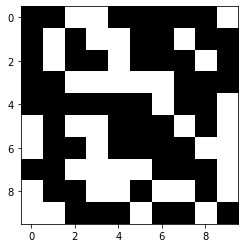

30+10:  Energy: -12 Spin: 0.02


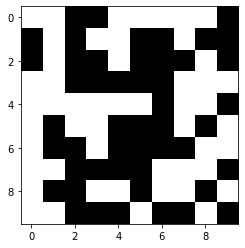

40+10:  Energy: 4 Spin: -0.1


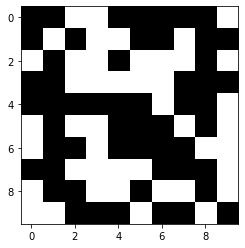

50+10:  Energy: -36 Spin: -0.1


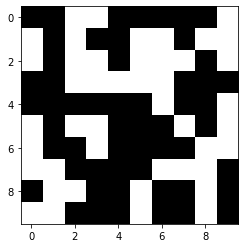

60+10:  Energy: -20 Spin: -0.06


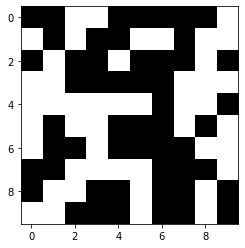

70+10:  Energy: -28 Spin: -0.1


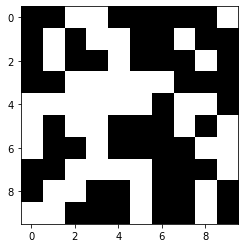

80+10:  Energy: -36 Spin: -0.14


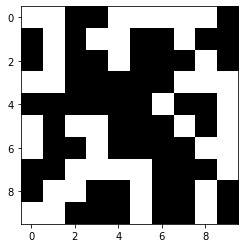

90+10:  Energy: -12 Spin: -0.14


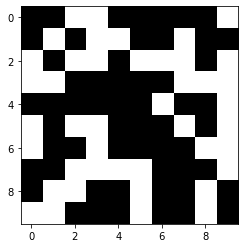

-------------------------------------------------------------------------------------


In [4]:
random_seed = 1
np.random.seed(random_seed)

def metropolis_mc_2d_ising(n_steps, n_lattice_sites, beta, J, debug=False,save_freq=10):
    configuration = 2*np.random.randint(2, size=(n_lattice_sites, n_lattice_sites))-1
    average_spins = []
    current_energys = []
    
    if debug is True: 
        print("Starting configuration:")
        plt.imshow(configuration,cmap="gray")   
        plt.show() 
    
    current_energy = energy_ising_2d(configuration,J)
    for i in range(n_steps):
        
        spin_to_change = np.random.randint(n_lattice_sites)
        # Change configuration[spin_to_change] to it's opposite value (1->-1, -1->1). 
        # There is a very simple mathematical operation that does this, regarless of it's current value
        configuration[spin_to_change] *= -1
        
        energy_flip = energy_ising_2d(configuration,J)
        
        r = rnd.uniform(0,1)
        if r<min(1,np.exp(-beta*(energy_flip-current_energy))):
            current_energy = energy_flip
        else:
            configuration[spin_to_change] *= -1
        
        average_spin = configuration.mean()
        
        if i%save_freq == 0:
            average_spins.append(average_spin) 
            current_energys.append(current_energy)

        if debug and i%10==0: 
            print("%i+10: "%i,"Energy:",current_energy,"Spin:",average_spin)
            plt.imshow(configuration,cmap="gray")   
            plt.show()
    configurationq = configuration
    return average_spins, current_energys, configurationq





average_spins, current_energys, configurationq = metropolis_mc_2d_ising(n_steps=100, n_lattice_sites=10, beta=0.1, J=1, debug=True)
print("-------------------------------------------------------------------------------------")



/tmp/ipykernel_155945/1123284836.py:25: RuntimeWarning: overflow encountered in exp
  if r<min(1,np.exp(-beta*(energy_flip-current_energy))):


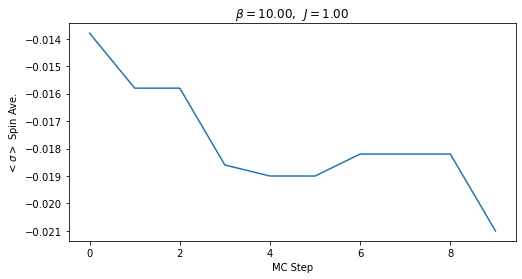

-------------------------------------------------------------------------------------


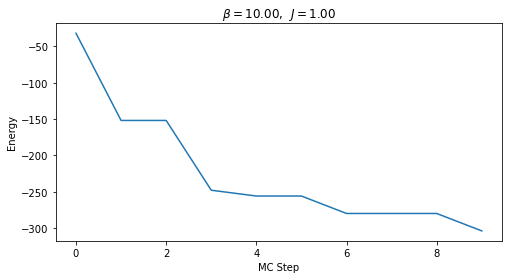

-------------------------------------------------------------------------------------


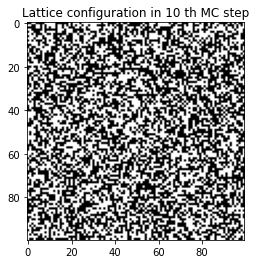

In [6]:


test_n_lattice_sites = 100
test_beta = 10
test_J = 1



test_n_steps = 10


average_spins, current_energys, configurationq = metropolis_mc_2d_ising(test_n_steps, test_n_lattice_sites, test_beta, test_J,save_freq=1)


plt.figure(figsize=(8,4))
plt.plot(average_spins)
plt.ylabel("$<\sigma> $ Spin Ave.")
plt.xlabel("MC Step")
plt.title("$\\beta=%.2f$,  $J=%.2f$"%(test_beta,test_J))
plt.show()

print("-------------------------------------------------------------------------------------")


plt.figure(figsize=(8,4))
plt.plot(current_energys)
plt.ylabel("Energy")
plt.xlabel("MC Step")
plt.title("$\\beta=%.2f$,  $J=%.2f$"%(test_beta,test_J))
plt.show()
print("-------------------------------------------------------------------------------------")


plt.imshow(configurationq,cmap="gray")
plt.title("Lattice configuration in %d th MC step"%(test_n_steps))
plt.show()


